In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv('train.csv')

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Biniş Yerleri:


S    644
C    168
Q     77
Name: Embarked, dtype: int64

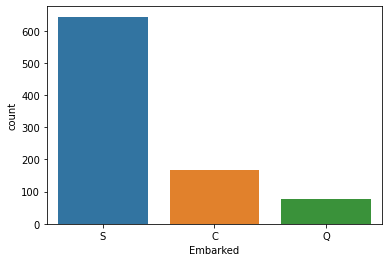

In [32]:
print("Biniş Yerleri:")
display(training['Embarked'].value_counts())

sns.countplot(x="Embarked",data=training)
plt.show()

Kadın ve erkek sayısı:


male      577
female    314
Name: Sex, dtype: int64

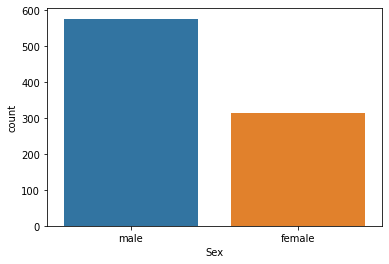

In [33]:
print("Kadın ve erkek sayısı:")
display(training["Sex"].value_counts())

sns.countplot(x="Sex",data=training)
plt.show()

Hayatta kalan sayısı:


Survived
0    549
1    342
Name: Survived, dtype: int64

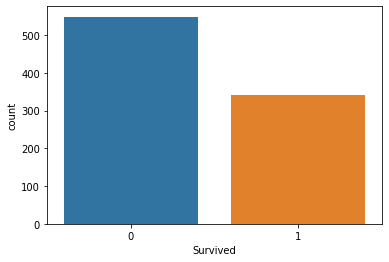

In [18]:
print("Hayatta kalan sayısı:")
display(training.groupby('Survived')['Survived'].count())
sns.countplot(x="Survived",data=training)
plt.show()

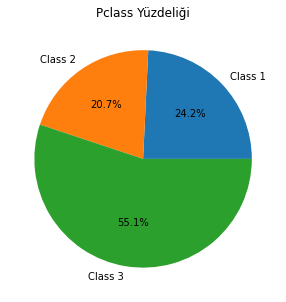

In [137]:
pclass_count = training.groupby('Pclass')['Pclass'].count()
plt.figure(figsize=(5,5))
plt.title('Pclass Yüzdeliği')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%')
plt.show()

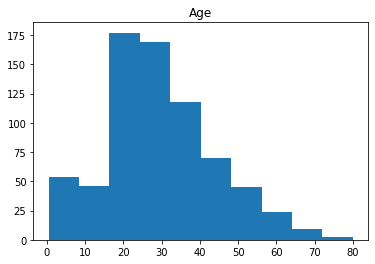

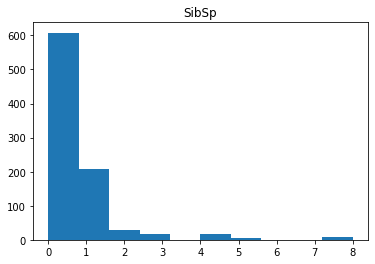

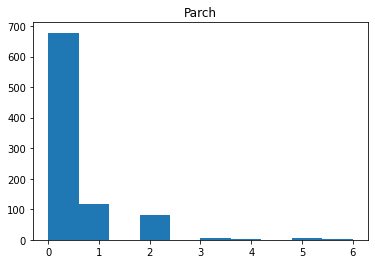

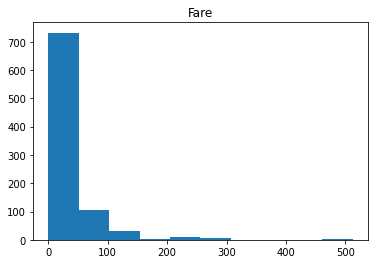

In [16]:
df_num = training[['Age','SibSp','Parch','Fare']]
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

# Korelasyon

In [5]:
training.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

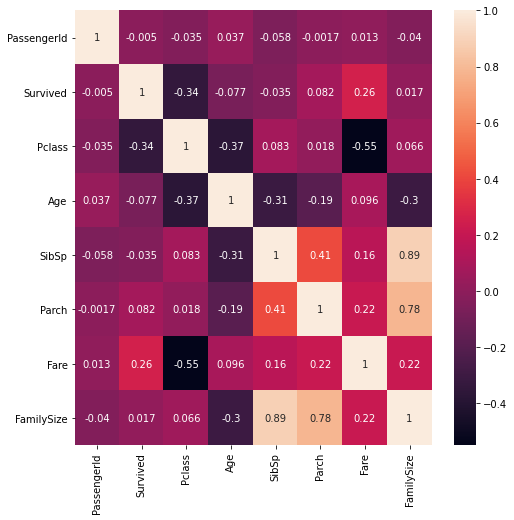

In [164]:
fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(training.corr(),annot=True,ax=ax)

# Yaş Ortalaması

Passenger class'a göre yaş ortalaması:


Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

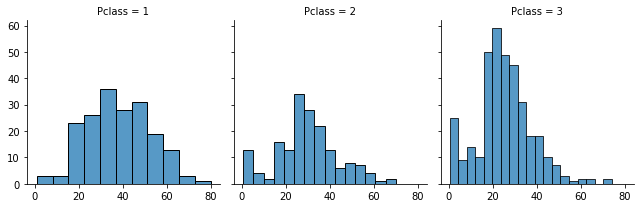

In [20]:
print("Passenger class'a göre yaş ortalaması:")
display(training.groupby('Pclass')["Age"].mean().round())

g = sns.FacetGrid(training, col="Pclass")
g.map_dataframe(sns.histplot, x="Age")

P.class ve cinsiyete göre yaş ortalaması:


Pclass  Sex   
1       female    35.0
        male      41.0
2       female    29.0
        male      31.0
3       female    22.0
        male      27.0
Name: Age, dtype: float64

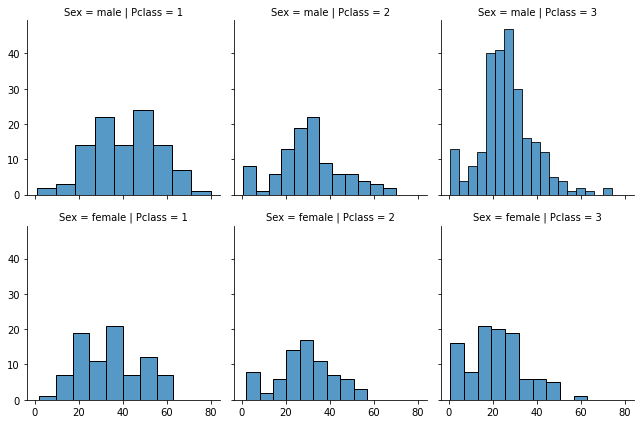

In [140]:
print("P.class ve cinsiyete göre yaş ortalaması:")
display(training.groupby(['Pclass',"Sex"])["Age"].mean().round())

g = sns.FacetGrid(training, col="Pclass", row='Sex')
g.map_dataframe(sns.histplot, x="Age")
plt.show()


# Hayatta Kalma Sayıları

Yaşa ve cinsiyete göre hayatta kalma:


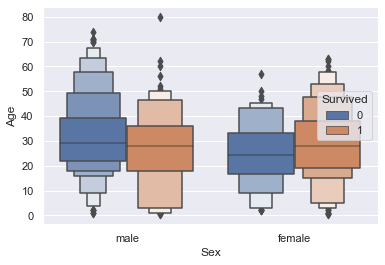

In [197]:
print("Yaşa ve cinsiyete göre hayatta kalma:")

sns.boxenplot(x="Sex", y="Age",
              hue="Survived",
              scale="linear",data=training)
plt.show()

In [193]:
training[training["Age"]>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AileTipi,Title
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,Yalnız,Mr
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0,Yalnız,Mr
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0,Yalnız,Mr
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,0,Yalnız,Mr
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0,Yalnız,Mr


Passenger class'a göre hayatta kalma sayısı 


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


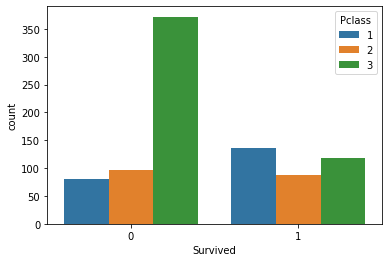

In [112]:
print("Passenger class'a göre hayatta kalma sayısı ")
display(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'PassengerId',aggfunc ='count'))

sns.countplot(x="Survived",hue="Pclass",data=training)
plt.show()
#g = sns.FacetGrid(training, col="Pclass")
#g.map_dataframe(sns.histplot, x="Survived")
#g.set(xticks=[0,1])

Cinsiyete göre hayatta kalma sayısı 


Sex,female,male
Survived,,
0,81,468
1,233,109


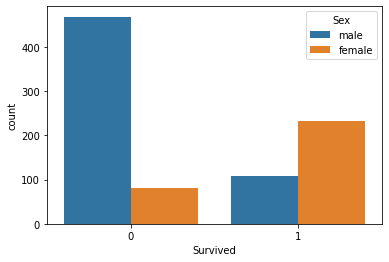

In [114]:
print("Cinsiyete göre hayatta kalma sayısı ")
display(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'PassengerId',aggfunc ='count'))

sns.countplot(x="Survived",hue="Sex",data=training)
plt.show()
#g = sns.FacetGrid(training, col="Sex")
#g.map_dataframe(sns.histplot, x="Survived")
#g.set(xticks=[0,1])

Biniş yerine göre hayatta kalma sayısı 


Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


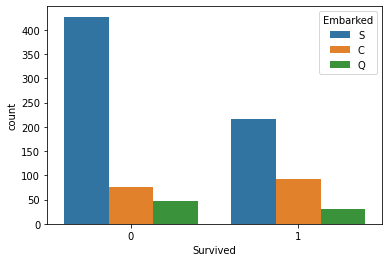

In [115]:
print("Biniş yerine göre hayatta kalma sayısı ")
display(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'PassengerId',aggfunc ='count'))

sns.countplot(x="Survived",hue="Embarked",data=training)
plt.show()

#g = sns.FacetGrid(training, col="Embarked")
#g.map_dataframe(sns.histplot, x="Survived")
#.set(xticks=[0,1])

Kardeş sayısına göre hayatta kalma sayısı 


SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


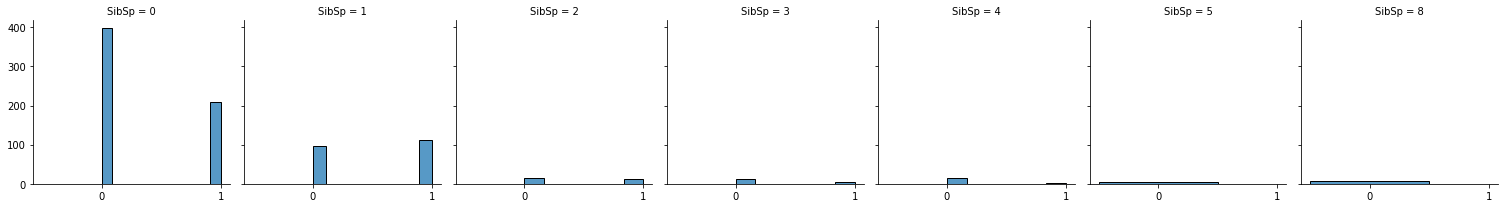

In [133]:
print("Kardeş sayısına göre hayatta kalma sayısı ")
display(pd.pivot_table(training, index = 'Survived', columns = 'SibSp', values = 'PassengerId',aggfunc ='count').fillna(0).astype(int))

g = sns.FacetGrid(training, col="SibSp")
g.map_dataframe(sns.histplot, x="Survived")
g.set(xticks=[0,1])
plt.show()

Parch'a göre hayatta kalma sayısı 


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


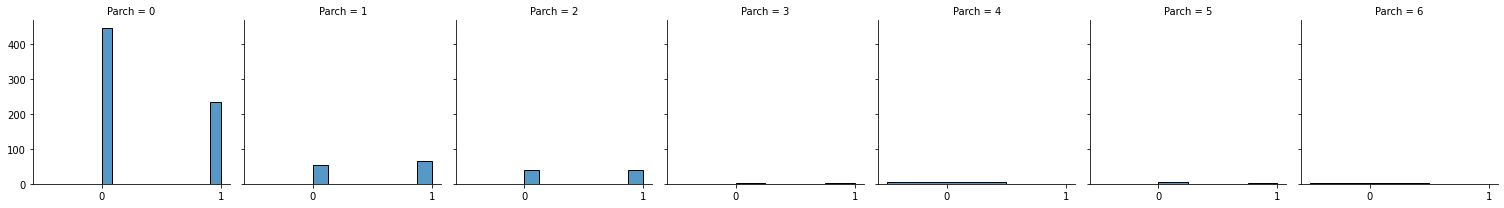

In [132]:
print("Parch'a göre hayatta kalma sayısı ")
display(pd.pivot_table(training, index = ['Survived'],columns = 'Parch', values = 'PassengerId',aggfunc ='count').fillna(0).astype(int))

g = sns.FacetGrid(training, col="Parch")
g.map_dataframe(sns.histplot, x="Survived")
g.set(xticks=[0,1])
plt.show()


Cinsiyet ve Passenger class'a göre hayatta kalma sayısı 


PassengerId
Survived Pclass Sex                
0        1      female            3
                male             77
         2      female            6
                male             91
         3      female           72
                male            300
1        1      female           91
                male             45
         2      female           70
                male             17
         3      female           72
                male             47

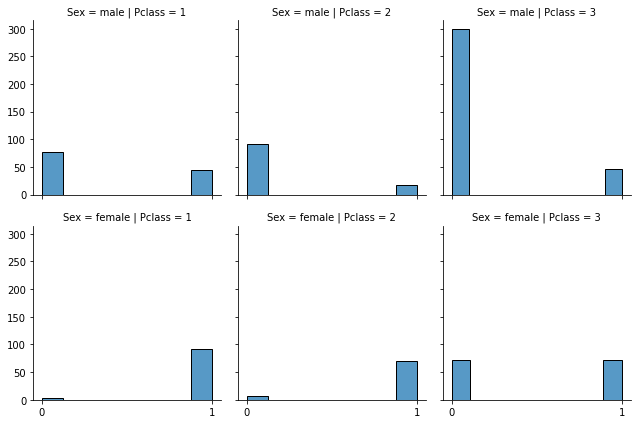

In [130]:
print("Cinsiyet ve Passenger class'a göre hayatta kalma sayısı ")
display(pd.pivot_table(training, index = ['Survived',"Pclass","Sex"], values = 'PassengerId',aggfunc ='count'))

g = sns.FacetGrid(training, col="Pclass",row="Sex")#,size=3, aspect=1.2
g.map_dataframe(sns.histplot, x="Survived")
g.set(xticks=[0,1])
plt.show()


# Cabine Göre Hayatta Kalma

In [34]:
training["Deck"]=training["Cabin"].apply(lambda s:s[0] if pd.notnull(s) else "M")

<AxesSubplot:xlabel='Deck'>

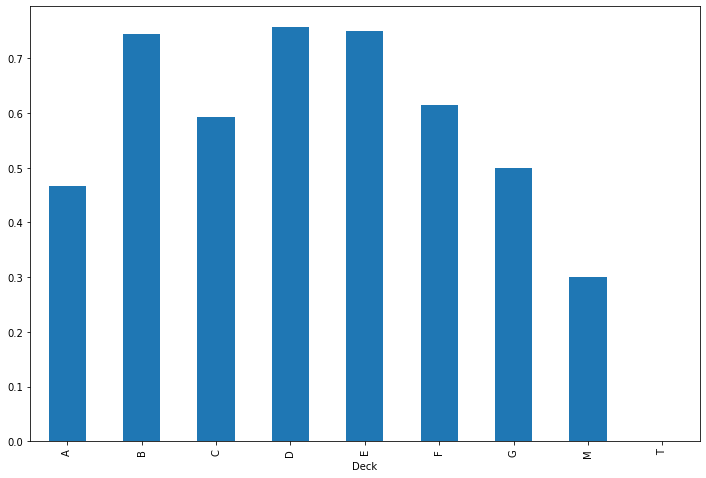

In [35]:
training.groupby('Deck')["Survived"].mean().plot(kind="bar",figsize=(12,8))

# Unvana Göre Hayatta Kalma Sayısı

In [36]:
training["Name"][1]#.split('.')[0].split(',')[1].strip(' ')

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [37]:
def titling(X, attrib):
    titles = []
    for i in range(len(X)):
        titles.append(str(training[attrib][i]).split('.')[0].split(',')[1].strip(' '))
    
    return titles

In [38]:
training['Title'] = titling(training,'Name')
training['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [39]:
training[['Title', 'PassengerId']].groupby(['Title'],as_index=False).count()

,Title,PassengerId
0,Capt,1
1,Col,2
2,Don,1
3,Dr,7
4,Jonkheer,1
5,Lady,1
6,Major,2
7,Master,40
8,Miss,182
9,Mlle,2


In [40]:
training['Title'] = training['Title'].replace('Mlle', 'Miss')
training['Title'] = training['Title'].replace('Ms', 'Miss')
training['Title'] = training['Title'].replace('Mme', 'Mrs')

In [41]:
pd.pivot_table(training, index = 'Survived', columns = 'Title', values = 'PassengerId',aggfunc ='count').fillna(0).astype(int)

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mr,Mrs,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,436,26,6,0,0
1,0,1,0,3,0,1,1,23,130,81,100,0,1,1


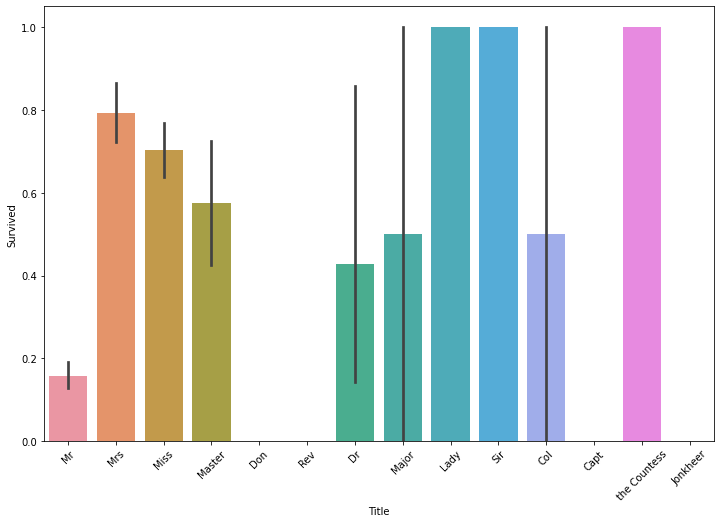

In [42]:
plt.figure(figsize=(12, 8))
g = sns.barplot(data=training, x='Title', y='Survived')
g.set_xticklabels(labels=training['Title'].unique(), rotation=45)
plt.show()

# Aile Boyutuna Göre Hayatta Kalma

In [43]:
training['AileBoyutu'] = training['SibSp'] + training['Parch']
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,AileBoyutu
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M,Mr,0


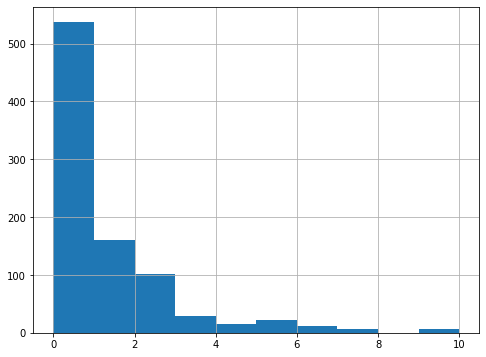

In [44]:
training['AileBoyutu'].hist(bins =10, figsize=(8, 6))
plt.show()

In [45]:
training['AileTipi'] = pd.cut(training['AileBoyutu'],bins=[-1, 0.5, 4, np.inf],  labels=['Yalnız', 'Küçük', 'Büyük'])

In [46]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,AileBoyutu,AileTipi
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M,Mr,1,Küçük
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,1,Küçük
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,Miss,0,Yalnız
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,1,Küçük
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M,Mr,0,Yalnız


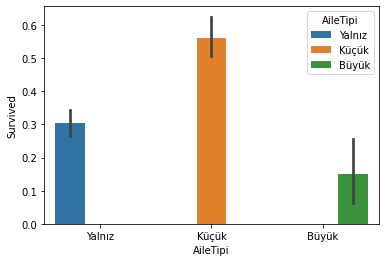

In [47]:
sns.barplot(data=training, x='AileTipi', y ='Survived', hue='AileTipi')
plt.show()

# Ücrete Göre Hayatta Kalma

Passenger class'a göre fiyat ortalaması:


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

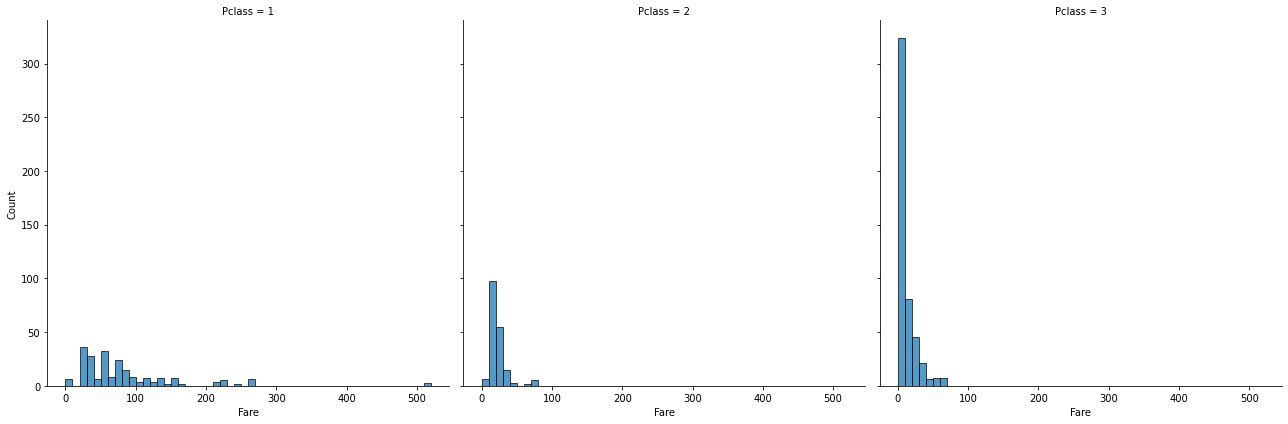

In [48]:
print("Passenger class'a göre fiyat ortalaması:")
display(training.groupby('Pclass')["Fare"].mean())

sns.displot(
    training, x="Fare", col="Pclass",
    binwidth=10, height=6, facet_kws=dict(margin_titles=True),
)
plt.show()

In [49]:
training['FareGrup'] = pd.cut(training['Fare'], bins = [0, 41, 101, 201, np.inf], labels=[1, 2, 3, 4])
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,AileBoyutu,AileTipi,FareGrup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M,Mr,1,Küçük,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,1,Küçük,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,Miss,0,Yalnız,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,1,Küçük,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M,Mr,0,Yalnız,1


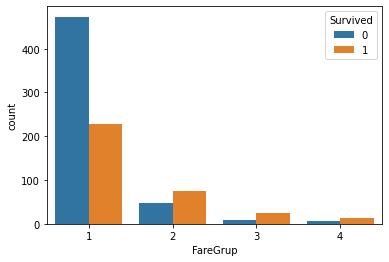

In [26]:
sns.countplot(x="FareGrup",hue="Survived",data=training)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

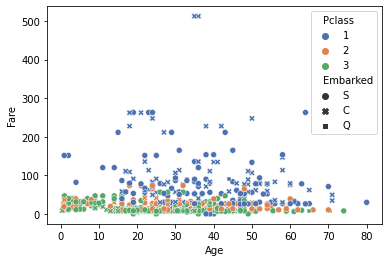

In [27]:
sns.scatterplot(data=training, x="Age", y="Fare",hue="Pclass",palette="deep",style="Embarked")

In [25]:
training[training["Fare"]>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AileBoyutu,AileTipi
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0,Yalnız
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,Küçük
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,Yalnız
